In [1]:
#Description This program detects breast cancer, based off of data.
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
#import the dataset
df=pd.read_csv('breast.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
#getting information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [80]:
#getting information about columns
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [7]:
df.shape

(569, 33)

In [81]:
#Count the number of empoty values in each column
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [82]:
df=df.drop('Unnamed: 32',axis=1)
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [83]:
#Get the new count of the number of rows and columns
df.shape

(569, 32)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

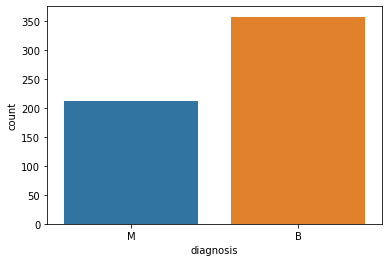

In [16]:
#Visualize the count
sns.countplot(df['diagnosis'],label='count')

In [84]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [85]:
#Encode the categorical data values
from sklearn.preprocessing import LabelEncoder
labelencoder_Y=LabelEncoder()
#encoding categorical data
df.iloc[:,1]=labelencoder_Y.fit_transform(df.iloc[:,1].values)

In [27]:
df.iloc[:,1]

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [86]:
#Create a pair plot
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


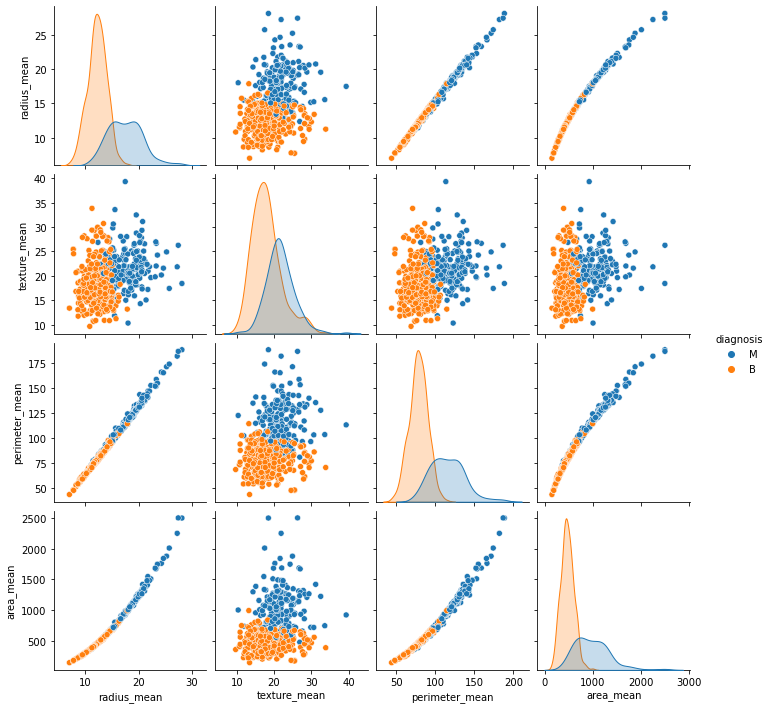

In [31]:
#Create a pair plot
sns.pairplot(df.iloc[:,1:6],hue='diagnosis')

In [33]:
#Print the first 
df.head(4)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300


In [34]:
df.iloc[:,1:12].corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


<AxesSubplot:>

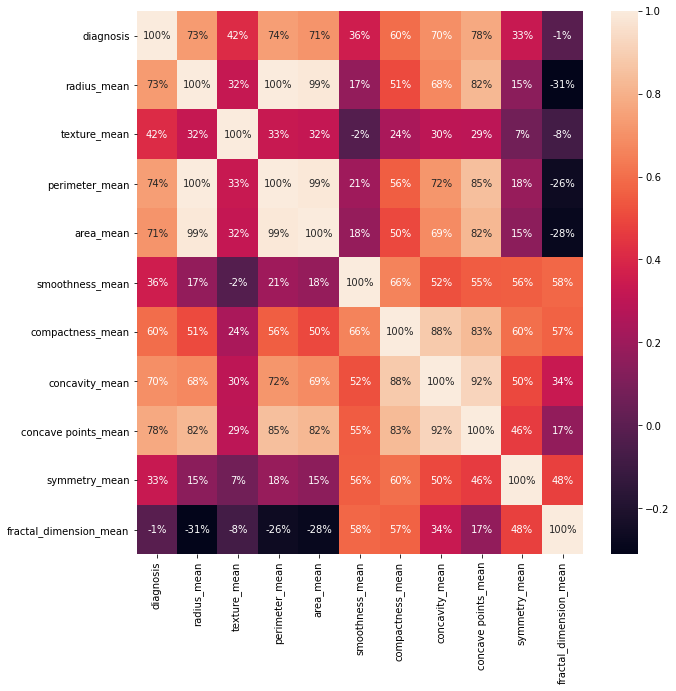

In [39]:
#Visualize the correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,1:12].corr(),annot=True,fmt=".0%")

In [40]:
#Split the data set into independent (x ) and dependent (y)  data sets\]
#chaning the into array with .values function
x=df.iloc[:,2:31].values
y=df.iloc[:,1].values
type(x)


numpy.ndarray

In [41]:
type(y)

numpy.ndarray

In [87]:
#Split the dataset into 75% training  and 25% testing
#import train_test_split from model_selection
from sklearn.model_selection import train_test_split
#spliting the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [44]:
#Scaling the which is feature scaling which convert data from 0 to 1
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)


In [88]:

x_train

array([[1.185e+01, 1.746e+01, 7.554e+01, ..., 1.316e-01, 9.140e-02,
        3.101e-01],
       [1.122e+01, 1.986e+01, 7.194e+01, ..., 1.335e-02, 2.022e-02,
        3.292e-01],
       [2.013e+01, 2.825e+01, 1.312e+02, ..., 3.215e-01, 1.628e-01,
        2.572e-01],
       ...,
       [9.436e+00, 1.832e+01, 5.982e+01, ..., 1.144e-01, 5.052e-02,
        2.454e-01],
       [9.720e+00, 1.822e+01, 6.073e+01, ..., 0.000e+00, 0.000e+00,
        1.909e-01],
       [1.151e+01, 2.393e+01, 7.452e+01, ..., 3.630e-01, 9.653e-02,
        2.112e-01]])

In [55]:
#Create a function for the models
def models(x_train,y_train):
    #Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log=LogisticRegression(random_state=0)
    log.fit(x_train,y_train)
    #Decision Tree Classifier
    from sklearn.tree import DecisionTreeClassifier
    tree=DecisionTreeClassifier(criterion='entropy',random_state=0)
    tree.fit(x_train,y_train)
    #Random Forest Classifier
    from sklearn.ensemble import RandomForestClassifier
    forest=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
    forest.fit(x_train,y_train)
    #print the models accuracy on the training data
    print('[0]Logistic Regression Training Accuracy:',log.score(x_train,y_train))
    print('[0]Decision Tree Classifier Accuracy:',tree.score(x_train,y_train))
    print('[0] Random Forest Classifier Accuracy:',forest.score(x_train,y_train)) 
    return log,tree,forest

In [59]:
#calling the function
model=models(x_train,y_train)

[0]Logistic Regression Training Accuracy: 0.9906103286384976
[0]Decision Tree Classifier Accuracy: 1.0
[0] Random Forest Classifier Accuracy: 0.9953051643192489


In [61]:
#test model accracy on test data on confusion metrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,model[0].predict(x_test))
print(cm)

[[86  4]
 [ 3 50]]


In [63]:
#Show another way to get metrics of the models
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
for i in range(0,len(model)):
    print('Model:',model[i])
    print( classification_report(y_test,model[i].predict(x_test)))
    print( accuracy_score(y_test,model[i].predict(x_test)))


Model: LogisticRegression(random_state=0)
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        90
           1       0.93      0.94      0.93        53

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143

0.951048951048951
Model: DecisionTreeClassifier(criterion='entropy', random_state=0)
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        90
           1       0.88      0.96      0.92        53

    accuracy                           0.94       143
   macro avg       0.93      0.94      0.93       143
weighted avg       0.94      0.94      0.94       143

0.9370629370629371
Model: RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        90
       

In [64]:
#Pring the predictio nof Random Forest Classifier Model
pred=model[2].predict(x_test)
print(pred)
print(y_test)

[1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]


In [70]:
prediction=model[1].predict(x_test)

In [78]:
pd.concat([pd.DataFrame(x_test),pd.DataFrame(prediction)],axis=1)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,0
0,-0.183990,0.221710,-0.117614,-0.269734,0.971934,0.691634,0.664224,0.863799,1.072644,1.301085,...,0.060892,0.605827,0.203987,-0.029394,1.128647,0.737042,0.974655,1.400897,1.169778,1
1,-0.239276,1.209539,-0.307766,-0.327565,-0.574929,-0.925802,-0.739564,-0.711490,-0.805361,-0.983676,...,-0.382830,1.321999,-0.473366,-0.440094,-0.136105,-0.882864,-0.597682,-0.795884,-0.817752,0
2,-0.003585,-0.793269,-0.077825,-0.116541,-1.137363,-0.861684,-0.821907,-0.560774,-0.918722,-0.981051,...,-0.262206,-1.016137,-0.312106,-0.331351,-1.267725,-0.909544,-0.920950,-0.461028,-1.354263,0
3,0.066249,-0.269072,-0.009554,-0.034715,-2.084979,-0.923244,-0.775266,-0.890594,-0.744902,-0.981051,...,0.019966,-0.083704,-0.026824,-0.077357,-1.664901,-0.242558,-0.523635,-0.564923,-0.483303,0
4,-0.291651,-0.216861,-0.370173,-0.370939,-0.444036,-1.171188,-0.764808,-0.490836,-1.379721,-0.617537,...,-0.608998,-0.467647,-0.683558,-0.609035,-1.551295,-1.231495,-0.981330,-0.946123,-1.613809,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,2.670481,1.568750,2.598961,3.154949,-0.085441,1.054854,1.271274,1.947197,0.290456,-0.032239,...,3.205712,1.365878,3.056812,4.047708,0.715939,0.893638,1.276767,2.221756,0.330173,1
139,-1.024910,0.152792,-0.955288,-0.954178,1.081013,0.408562,-0.294314,-0.453415,0.339579,1.900818,...,-1.069951,-0.477050,-1.047932,-0.942062,-0.087290,-0.310996,-0.637879,-0.776044,-0.924009,0
140,-0.492424,-1.501248,-0.523886,-0.541050,-0.430401,-0.737882,-0.717206,-0.562064,-0.540854,-0.689715,...,-0.542225,-1.022406,-0.598620,-0.572140,-0.122792,-0.296497,-0.428008,-0.084827,0.342366,0
141,-0.146163,-1.779010,-0.148189,-0.262043,2.233150,-0.027984,-0.246111,0.446750,2.157125,0.403453,...,-0.440987,-2.084910,-0.471212,-0.493301,0.582807,-0.699588,-0.824520,-0.583551,-0.354401,0
